In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))
from pprint import pprint
from dataset.data_loader import DataLoader, playtime_forever_users_games_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer
from utils.utils import get_game_name_and_scores

from models.ncf_model import NCFModel

Before 0.5744286179542542


,id,name,score
0,252490,Rust,0.245462
1,381210,Dead by Daylight,0.244838
2,1245620,ELDEN RING,0.244776
3,1086940,Baldur's Gate 3,0.244089
4,346110,ARK: Survival Evolved,0.243998
5,1172470,Apex Legends™,0.243977
6,227300,Euro Truck Simulator 2,0.243538
7,739630,Phasmophobia,0.243359
8,548430,Deep Rock Galactic,0.243312
9,1174180,Red Dead Redemption 2,0.243194


,id,name,score
0,1550270,Togges,0.237742
1,1226000,Nations At War Digital Core Game,0.237726
2,1276610,My Cute Roommate,0.237723
3,1882280,Forgotten Realms: The Archives - Collection Two,0.237718
4,1597730,Dogs Organized Neatly,0.237667
5,705250,Cross Set Infinity,0.237656
6,1067350,Sophie's Dice,0.237624
7,2090150,Furry Sex: Poker 🃏♥️,0.237623
8,1643180,Artist Life Simulator,0.237572
9,777650,Yet Another Research Dog,0.237517


After 0.5744286179542542
Fine Tuned User Output
0.8793486952781677


,id,name,score
0,1617480,Fight Party,0.927530
1,582010,Monster Hunter: World,0.882542
2,619740,The Inevitability,0.849841
3,415300,Monster Monpiece,0.844483
4,940980,Phantasmat: The Dread of Oakville Collector's ...,0.829312
5,407980,Sakura Beach 2,0.824071
6,657040,The Myth Seekers: The Legacy of Vulcan,0.820042
7,552900,Fields XY,0.816118
8,200710,Torchlight II,0.815980
9,222940,THE KING OF FIGHTERS XIII STEAM EDITION,0.811059


,id,name,score
0,1332450,Open The Gates!,0.355562
1,1258460,Escape First 3,0.355469
2,1641060,Castles & Catapults,0.354220
3,1246250,An Airport for Aliens Currently Run by Dogs,0.353008
4,418260,Gumball Drift,0.349316
5,1838820,Life of a Space Force Captain,0.348215
6,395960,عالم أريب,0.343080
7,575690,PARKAN: THE IMPERIAL CHRONICLES,0.339020
8,778860,Animals Memory: Insect,0.336209
9,693800,Loco Parentis / 孤女咒怨,0.328324


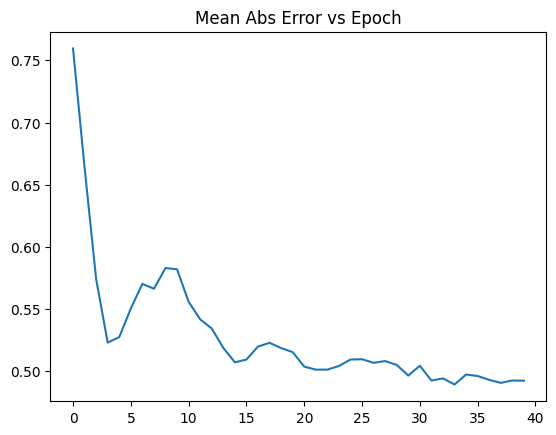

In [5]:
# Test Fine Tuning
# data_loader = DataLoader.load_from_file('test_ncf_data_loader', use_published_models_path=True, load_live_data_loader=True)
data_loader = DataLoader.load_from_file('test_evaluation_data_loader_embed_all_except_tags', use_published_models_path=False, load_live_data_loader=True)
model = NCFModel()
# model.load('evaluation_test_ncf_low_weight_decay', load_published_model=True)
model.load('evaluation_test_gcf_embed_all_except_tags', load_published_model=False)
model.new_seed(None)
model.fine_tune_num_epochs = 40
model.fine_tune_weight_decay = 1e-6#1e-3
model.fine_tune_learning_rate = 1e-2
model.set_data_loader(data_loader)
user_to_fine_tune = 76561198103368250 # 76561198166465514 # 76561198835352289 #  #  #  # 
print('Before', model.get_score_between_user_and_game(76561198880605436, 367520))
model.ncf.add_new_user()
model.user_to_index[user_to_fine_tune] = len(model.user_nodes)
model.user_nodes.append(user_to_fine_tune)
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[-10:]))
model.fine_tune(user_to_fine_tune)
print('After', model.get_score_between_user_and_game(76561198880605436, 367520))
print('Fine Tuned User Output')
print(model.get_score_between_user_and_game(user_to_fine_tune, 367520))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[-10:]))

In [2]:
data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'], game_embeddings=['name'])
data_loader.load_random_edge_train_test_split(train_percentage=0.9, test_percentage=0.1, seed=0)
data_loader.save_data_loader_parameters('test_ncf_data_loader', overwrite=True)

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 11340200


Training: 100%|██████████| 40/40 [04:42<00:00,  7.05s/it]


0.2611604928970337
0.602492094039917
[0.2611604928970337, 0.602492094039917]


,id,name,score
0,730,Counter-Strike 2,1.333981
1,255300,Journey of a Roach,1.166889
2,807870,Survival Planet,0.935102
3,547750,Endless Night - Alpha,0.881796
4,1102930,KoboldKare,0.873163
5,385230,Ninjahtic,0.783991
6,289820,Dracula 2: The Last Sanctuary,0.770226
7,346040,Joe's Diner,0.758548
8,413420,Danganronpa 2: Goodbye Despair,0.758197
9,1363430,Propagation VR,0.749979


,id,name,score
0,968550,Tinytopia,-0.491004
1,418190,Helen's Mysterious Castle,-0.493230
2,679300,PATHOS,-0.503005
3,367050,Vindicator: Uprising,-0.509307
4,881560,How To Date A Magical Girl!,-0.515865
5,465750,Tank Battle: North Africa,-0.523329
6,682290,Zeus' Battlegrounds,-0.528777
7,589530,Hakuoki: Kyoto Winds,-0.586434
8,874390,The Battle of Polytopia,-0.833708
9,849680,TimeTekker,-0.899658


Test Loss 0.1535312533378601


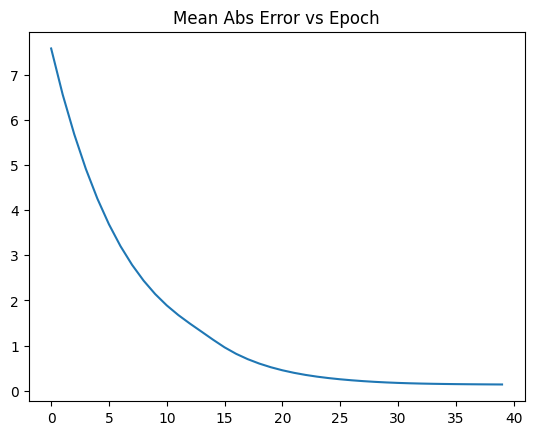

In [4]:
# base collaborative filter test
cf_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [], seed=0, model_type='cf', fine_tune_num_epochs=40, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-6)
cf_model.set_data_loader(data_loader)
cf_model.train(debug=True)
cf_model.save('test_cf_model', overwrite=True)
print(cf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(cf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(cf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, cf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, cf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))
print('Test Loss', cf_model.test_loss())

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 11340301


Training: 100%|██████████| 40/40 [14:34<00:00, 21.86s/it]


0.70597327
[(229480, 1.346836), (492600, 1.2492095), (2229350, 1.2368684), (1281190, 1.2354189), (1842610, 1.2267547), (388900, 1.2261814), (737380, 1.219301), (842510, 1.2147899), (328310, 1.2034427), (360970, 1.1956581)]
[(208200, 0.43849725), (678800, 0.4368711), (645630, 0.42987695), (1727270, 0.42860356), (1736840, 0.4244921), (2588590, 0.4144491), (358260, 0.4087724), (378070, 0.3923778), (630080, 0.39132765), (375930, 0.3867215)]
Test Loss 0.2547321915626526


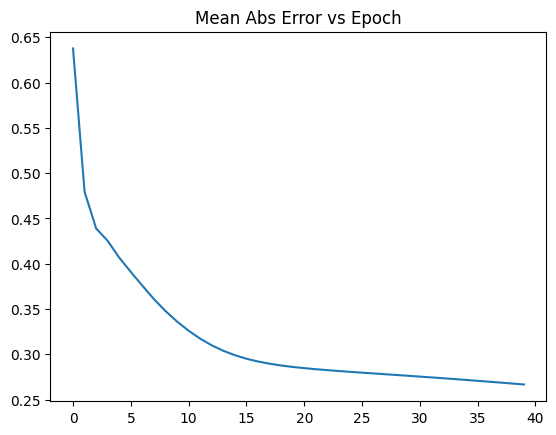

In [3]:
# generalized collaborative filter test
gcf_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-3, weight_decay=1e-6, mlp_hidden_layer_sizes = [], seed=0, model_type='gcf', fine_tune_num_epochs=40, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-6)
gcf_model.set_data_loader(data_loader)
gcf_model.train(debug=True)
gcf_model.save('test_gcf_model', overwrite=True)
print(gcf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(gcf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(gcf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, gcf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, gcf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))
print('Test Loss', gcf_model.test_loss())

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 11399081


Training: 100%|██████████| 40/40 [40:32<00:00, 60.80s/it]


0.8340055
[(615490, 1.0547082), (1337590, 1.0247288), (2388430, 1.0163636), (592570, 1.014163), (713500, 1.013082), (1091500, 1.0128273), (798170, 1.0113983), (531140, 1.0089062), (1820740, 1.0051131), (2375190, 1.0038261)]
[(709560, 0.8038294), (459840, 0.80380493), (787620, 0.8030879), (424840, 0.8017356), (288610, 0.8014674), (542410, 0.80118245), (1001270, 0.8003447), (588980, 0.7985176), (439700, 0.7918845), (407530, 0.7849404)]
Test Loss 0.1930522322654724


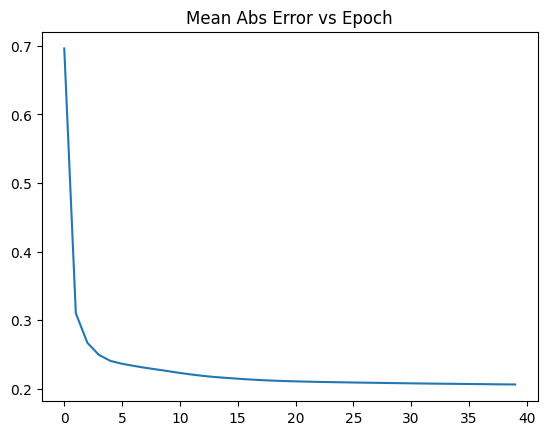

In [4]:
# mlp test
mlp_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-3, weight_decay=1e-6, mlp_hidden_layer_sizes = [128, 128, 128], seed=0, model_type='mlp', fine_tune_num_epochs=40, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-6)
mlp_model.set_data_loader(data_loader)
mlp_model.train(debug=True)
mlp_model.save('test_mlp_model', overwrite=True)
print(mlp_model.get_score_between_user_and_game(76561198835352289, 967050))
print(mlp_model.get_score_between_user_and_game(76561198835352289, 578080))
print(mlp_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, mlp_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, mlp_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))
print('Test Loss', mlp_model.test_loss())

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 22739381


Training: 100%|██████████| 40/40 [1:26:00<00:00, 129.00s/it]


0.82280076
[(2146180, 1.2310467), (921780, 1.2092412), (418190, 1.2010572), (815030, 1.1907902), (204030, 1.1545674), (1955800, 1.1476262), (1451720, 1.1156657), (552350, 1.11445), (652600, 1.1111959), (469920, 1.103363)]
[(235070, 0.79751), (250520, 0.7974302), (976030, 0.7972898), (97110, 0.7966955), (428210, 0.79652715), (516430, 0.7959233), (1094730, 0.792199), (2096820, 0.7911787), (466240, 0.7910533), (407530, 0.7898907)]
Test Loss 0.18954771757125854


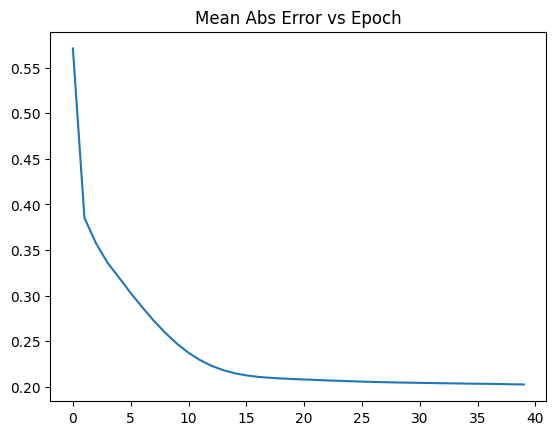

In [5]:
# ncf test
ncf_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-3, weight_decay=1e-6, mlp_hidden_layer_sizes = [128, 128, 128], seed=0, model_type='ncf', fine_tune_num_epochs=40, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-6)
ncf_model.set_data_loader(data_loader)
ncf_model.train(debug=True)
ncf_model.save('test_ncf_model', overwrite=True)
print(ncf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(ncf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(ncf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, ncf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, ncf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))
print('Test Loss', ncf_model.test_loss())

In [4]:
# data_loader = DataLoader.load_from_file('test_evaluation_data_loader_embed_all_except_tags', use_published_models_path=False, load_live_data_loader=True)
model = NCFModel()
model.load('evaluation_test_cf_low_weight_decay', load_published_model=False)
model.set_data_loader(data_loader)

RuntimeError: Error(s) in loading state_dict for NCF:
	Missing key(s) in state_dict: "embedding_gcf_known_game.weight", "embedding_gcf_user_for_known_game.weight". 
	Unexpected key(s) in state_dict: "embedding_mlp_user.weight", "embedding_mlp_game.weight", "mlp_layers.0.weight", "mlp_layers.0.bias", "mlp_layers.2.weight", "mlp_layers.2.bias", "mlp_layers.4.weight", "mlp_layers.4.bias", "ncf_fc.weight", "ncf_fc.bias". 

In [ ]:
# test_user = 76561199048589805 # Only 1 game
# test_user = 76561198835352289 # Only 4 games
# test_user = 76561198880605436 # ~20 games
test_user = 76561199040442492 # ~400 games
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(test_user)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(test_user)[-10:]))

AttributeError: 'NCFModel' object has no attribute 'ncf'